In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.tree import export_graphviz,plot_tree

In [2]:
df=pd.read_csv(r"C:\Users\shash\OneDrive\Desktop\mit\3rd sem\ml\OneDrive_1_15-8-2023\DATASETS-16AUG2023\mtcars.csv")

In [3]:
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [5]:
df=df.drop('model', axis=1)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [6]:
x=df.drop('mpg',axis=1)
y=df['mpg']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30,shuffle=True)

In [8]:
regressor=DecisionTreeRegressor()

In [9]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [10]:
y_pred=regressor.predict(x_test)

In [11]:
y_pred

array([13.3, 19.2, 19.2, 24.4, 24.4, 33.9, 33.9])

[Text(0.315, 0.9375, 'x[1] <= 101.55\nsquared_error = 34.51\nsamples = 25\nvalue = 19.536'),
 Text(0.12, 0.8125, 'x[2] <= 89.5\nsquared_error = 2.056\nsamples = 3\nvalue = 32.233'),
 Text(0.08, 0.6875, 'x[4] <= 2.018\nsquared_error = 0.563\nsamples = 2\nvalue = 33.15'),
 Text(0.04, 0.5625, 'squared_error = 0.0\nsamples = 1\nvalue = 33.9'),
 Text(0.12, 0.5625, 'squared_error = 0.0\nsamples = 1\nvalue = 32.4'),
 Text(0.16, 0.6875, 'squared_error = -0.0\nsamples = 1\nvalue = 30.4'),
 Text(0.51, 0.8125, 'x[2] <= 177.5\nsquared_error = 13.953\nsamples = 22\nvalue = 17.805'),
 Text(0.3, 0.6875, 'x[4] <= 3.327\nsquared_error = 4.702\nsamples = 13\nvalue = 20.3'),
 Text(0.2, 0.5625, 'x[2] <= 95.0\nsquared_error = 1.71\nsamples = 8\nvalue = 21.65'),
 Text(0.12, 0.4375, 'x[9] <= 1.5\nsquared_error = 0.64\nsamples = 2\nvalue = 23.6'),
 Text(0.08, 0.3125, 'squared_error = 0.0\nsamples = 1\nvalue = 22.8'),
 Text(0.16, 0.3125, 'squared_error = -0.0\nsamples = 1\nvalue = 24.4'),
 Text(0.28, 0.4375, '

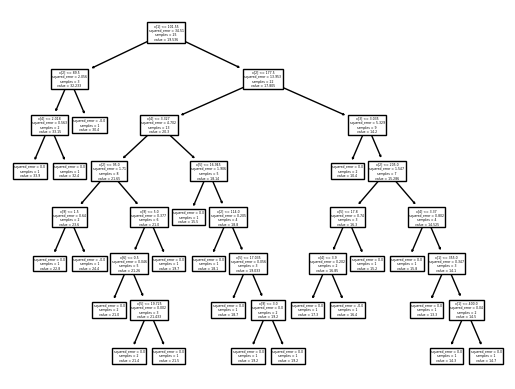

In [12]:
export_graphviz(regressor,out_file='tree.dot',feature_names=x.columns)
plot_tree(regressor)